In [24]:
import numpy as np
import pandas as pd
import gymnasium as gym
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Custom modules
from agent import *


SEED = 42

np.random.seed(SEED)

In [25]:
env = gym.make('FrozenLake-v1', is_slippery=False, map_name='4x4')

# Gaussian kernel
kernel = lambda x, y : np.exp(-np.linalg.norm(x - y) ** 2)

agent = QSpatialLambdaAgent(
    env=env,
    discount_factor=0.99,
    initial_epsilon=1.0,
    epsilon_decay=0.99,
    min_epsilon=0.0,
    learning_rate=0.99,
    seed=SEED,
    trace_decay=0.5,
    kernel = kernel
)


In [26]:
rewards = agent.learn(5000)

100%|██████████| 5000/5000 [00:01<00:00, 3290.04it/s]


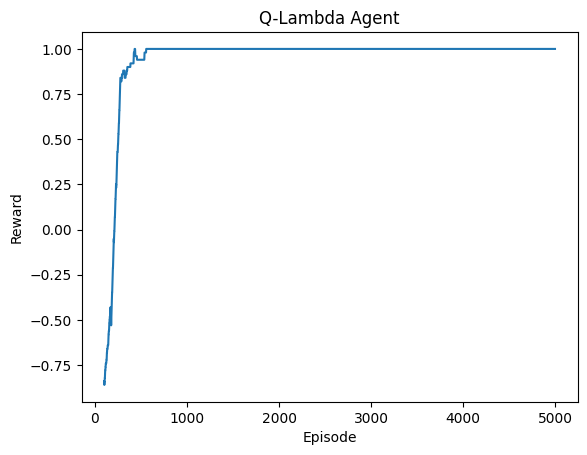

In [27]:
rewards = pd.Series(rewards)
fig, ax = plt.subplots()
ax.plot(rewards.rolling(100).mean())
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.set_title('Q-Lambda Agent')
plt.show()

In [28]:
env.close()